# Klimaet frem til i dag med fremtidsprognoser
Vi kan bruke de data vi har om strålingspådrivet som har vært til å si noe om temperaturresponsen. Vi må da først importere dataene som ligger i en csv-fil, og da bruker vi biblioteket `pandas`. Pandas gjør også at det er enkelt å lage plot fra de dataene som vi laster inn fra filen.

In [1]:
import pandas as pd
from calculate_temp_anomalies import calculate_temp_anomalies

In [2]:
df=pd.read_csv('futureforcing.csv',index_col = 0,sep=',',encoding = "latin-1")

<AxesSubplot:xlabel='year'>

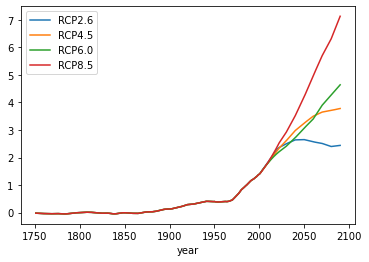

In [3]:
df.index=df.index.astype(int) # årstallene lastes inn som flyttall - her endres de til heltall
df.plot() # her lager vi plot fra de dataene som finnes i datafilen

In [4]:
# --------------------
# Feedback factors
# --------------------
lambda_planck=-3.2    
lambda_lapse=-0.8     
lambda_water=1.8      
lambda_cloud=0.70     
lambda_albedo=0.30    
lambda_other=0.0

In [5]:
lambda_sum=sum([lambda_planck,
    lambda_lapse,
    lambda_water,
    lambda_cloud,
    lambda_albedo,
    lambda_other])

In [6]:
# --------------------
# Deep ocean
# Heat uptake efficency [Wm-2K-1]
# --------------------
# CMIP3
gamma=-0.69  # best guesses [-1 to -0.5]

Hvilket scenarie ønsker du å se på?
Skriv inn i koden under
* RCP2.6
* RCP4.5
* RCP6.0
* RCP8.5

In [7]:
radiative_forcing = df['RCP8.5'].to_numpy()

Vi ønsker nå å beregne hvordan temperaturen endrer seg som resultat av hvilke strålingspådriv vi har slått på, verdiene vi har satt for tilbakekoblingsmekanismer, og varmeutveksling til havet. 

In [8]:
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma) # kaller opp funksjonen som regner ut temperaturendringene

<AxesSubplot:xlabel='year'>

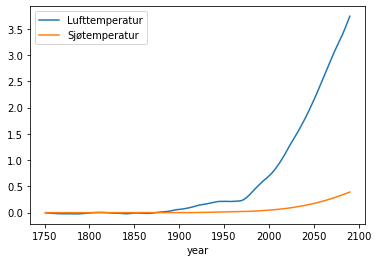

In [9]:
temp = pd.DataFrame(index=df.index)
temp['Lufttemperatur']=Ts
temp['Sjøtemperatur']=To
temp.plot()